Digite o nome do produto: controle ps5


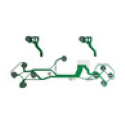

Valor: R$ 130
Link do produto: https://tinyurl.com/2lk5kxoo
----------------------------


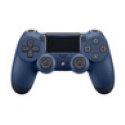

Valor: R$ 299
Link do produto: https://tinyurl.com/2kusvprh
----------------------------


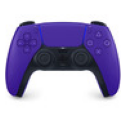

Valor: R$ 419.9
Link do produto: https://tinyurl.com/2offv6ad
----------------------------


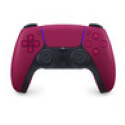

Valor: R$ 439
Link do produto: https://tinyurl.com/2qxuj9bj
----------------------------


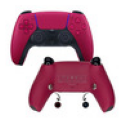

Valor: R$ 699.9
Link do produto: https://tinyurl.com/2gb3uk5t
----------------------------


In [96]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import io
import pyshorteners

def encurtar_url(url):
    s = pyshorteners.Shortener()
    return s.tinyurl.short(url)

def obter_dados_produtos(nome_produto):
    url = f"https://api.mercadolibre.com/sites/MLB/search?q={nome_produto}"
    response = requests.get(url)
    data = response.json()

    if "results" in data and len(data["results"]) > 0:
        valores = []
        imagens = []
        links = []

        for resultado in sorted(data["results"][:5], key=lambda x: x["price"]):
            valores.append(resultado["price"])
            imagem_url = resultado["thumbnail"]
            links.append(resultado["permalink"])

            imagem_response = requests.get(imagem_url)
            imagem = Image.open(io.BytesIO(imagem_response.content))
            imagens.append(imagem)

        return valores, imagens, links

    return None, None, None

nome_produto = input("Digite o nome do produto: ")

valores_produtos, imagens_produtos, links_produtos = obter_dados_produtos(nome_produto)

if valores_produtos is not None and imagens_produtos is not None and links_produtos is not None:
    for valor, imagem, link in zip(valores_produtos, imagens_produtos, links_produtos):
        plt.figure(figsize=(4, 3), dpi=50)  # Aumente o valor de dpi para melhorar a qualidade
        
        plt.imshow(imagem)
        plt.axis('off')
        plt.savefig('produto.png', bbox_inches='tight')  # Salvar a imagem com qualidade aprimorada
        plt.show()

        print(f"Valor: R$ {valor}")
        
        link_encurtado = encurtar_url(link)
        print(f"Link do produto: {link_encurtado}")
        
        print("----------------------------")
else:
    print("Produtos não encontrados")